# Absenteeism at Work

### Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### load dataset

In [2]:
df = pd.read_excel('Absent.xls')
pd.set_option('display.max_columns', None)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

# we have 740 rows and 21 variables

(740, 21)

In [4]:
df.isnull().sum()

# there is no null values in dataset

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df.info()

# all columns are in int format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [6]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


In [7]:
df.nunique()

#we can drop "ID",as it is not relatable to target

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [8]:
df.rename(columns = {'Reason for absence':'Reason','Day of the week':'Day', 'Month of absence':'Month','Transportation expense':'Transportation_expanses',
                    'Distance from Residence to Work':'Office_distance','Service time':'Time','Work load Average/day ':'Workload','Hit target':'Hit_target',
                    'Disciplinary failure':'Discipline','Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absence(hour)'}, inplace = True)

In [9]:
df['Absence(hour)'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [10]:
df.head()

,ID,Reason,Month,Day,Seasons,Transportation_expanses,Office_distance,Time,Age,Workload,Hit_target,Discipline,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absence(hour)
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


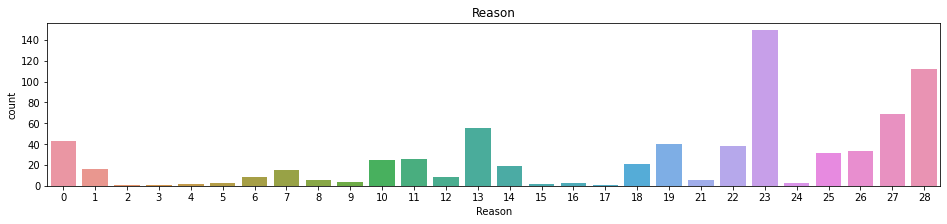

In [11]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Reason',data=df)
plt.title("Reason")
plt.show()

Higher reason for absence is 13,23,27 and 28 are as follow:

     Diseases of the musculoskeletal system and connective tissue
     medical consultation
     physiotherapy
     dental consultation

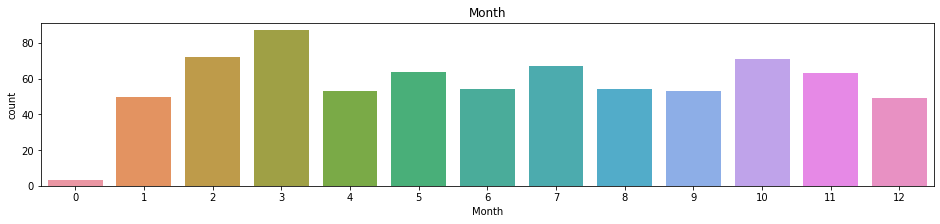

In [12]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Month',data=df)
plt.title("Month")
plt.show()

People are absence in feb and march month and apart from it in oct, nov month.


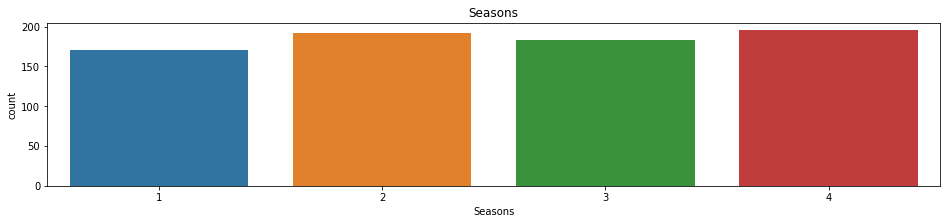

In [13]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Seasons',data=df)
plt.title("Seasons")
plt.show()

not looking much effective but we can say that absence in season 1 (summer) is lower while it goes higher in season 2(autumn)

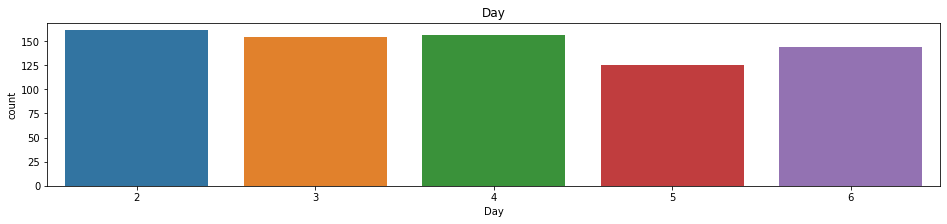

In [14]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Day',data=df)
plt.title("Day")
plt.show()

Monday is higher in terms of absence day

In [15]:
df.columns

Index(['ID', 'Reason', 'Month', 'Day', 'Seasons', 'Transportation_expanses',
       'Office_distance', 'Time', 'Age', 'Workload', 'Hit_target',
       'Discipline', 'Education', 'Son', 'Drinker', 'Smoker', 'Pet', 'Weight',
       'Height', 'BMI', 'Absence(hour)'],
      dtype='object')

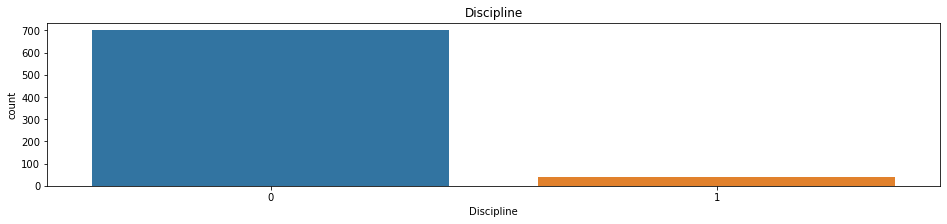

In [16]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Discipline',data=df)
plt.title("Discipline")
plt.show()

Non-Discipline employee is counted in higher absence while discipline employee is lower in it.

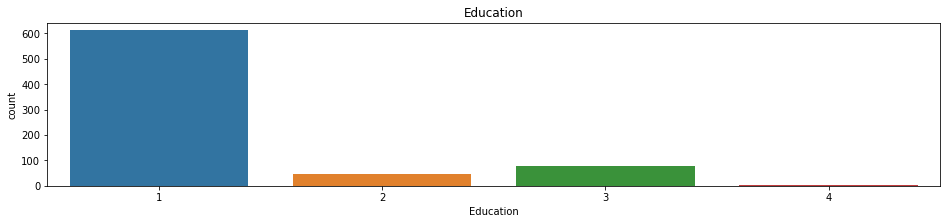

In [17]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Education',data=df)
plt.title("Education")
plt.show()

Un-educated or low educated employee are highly counted in absence while higher educated employee are disciplined and not high in absence.

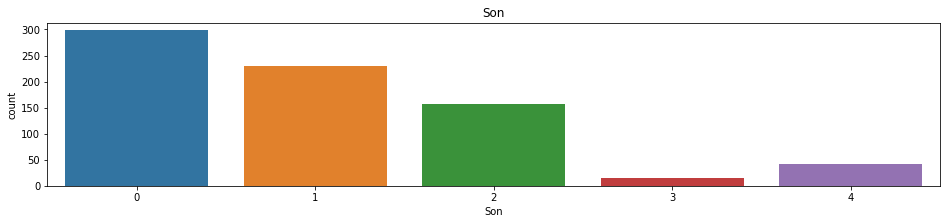

In [18]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Son',data=df)
plt.title("Son")
plt.show()

We can visulise that single employee or 0 child employee is higher and as no of son increase, absence hour is going to decrease.

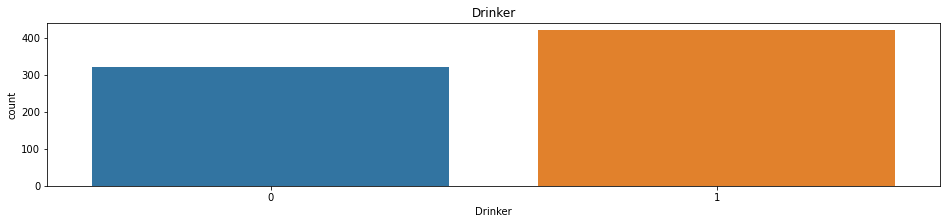

In [19]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Drinker',data=df)
plt.title("Drinker")
plt.show()

drinker employee are higher in absence 

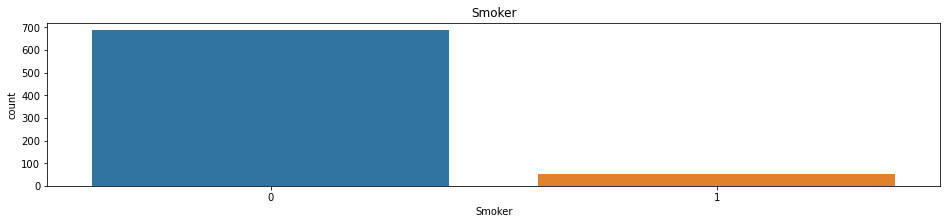

In [20]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Smoker',data=df)
plt.title("Smoker")
plt.show()

surprisigly we can visulise that smoker are not much counted in absence hour while non smokers are highly counted in absence hours

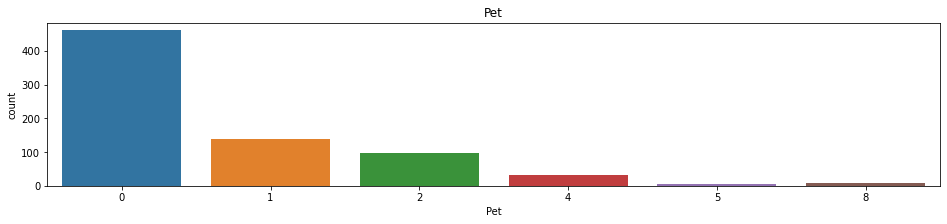

In [21]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Pet',data=df)
plt.title("Pet")
plt.show()

employee who have not pet have higher number in dataset

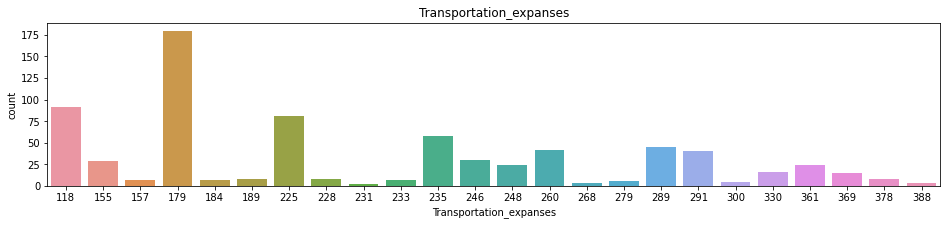

In [22]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Transportation_expanses',data=df)
plt.title("Transportation_expanses")
plt.show()

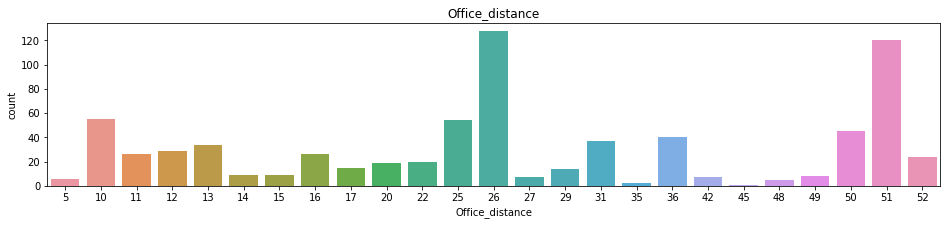

In [23]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Office_distance',data=df)
plt.title("Office_distance")
plt.show()

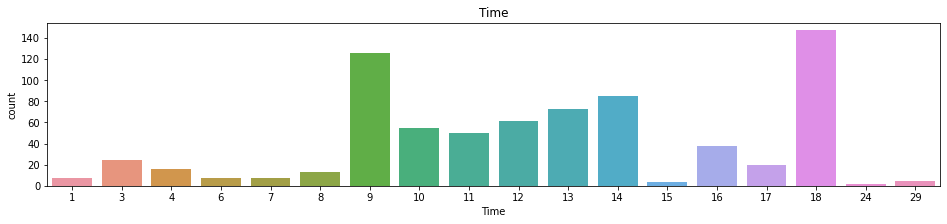

In [24]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Time',data=df)
plt.title("Time")
plt.show()

Slightly effective , where service time is high counted

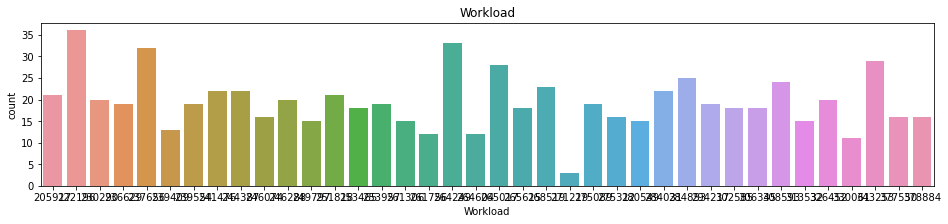

In [25]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Workload',data=df)
plt.title("Workload")
plt.show()

workload is un-stable counted in dataset

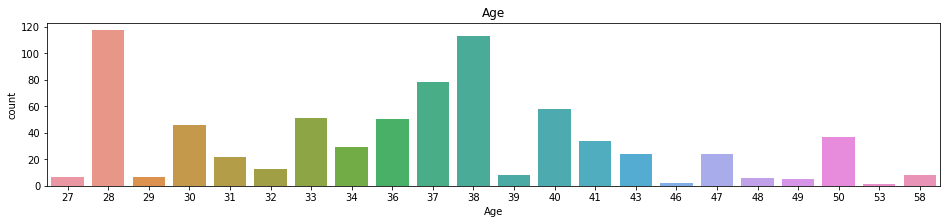

In [26]:
plt.figure(figsize=(16,3))
sns.countplot(x = 'Age',data=df)
plt.title("Age")
plt.show()

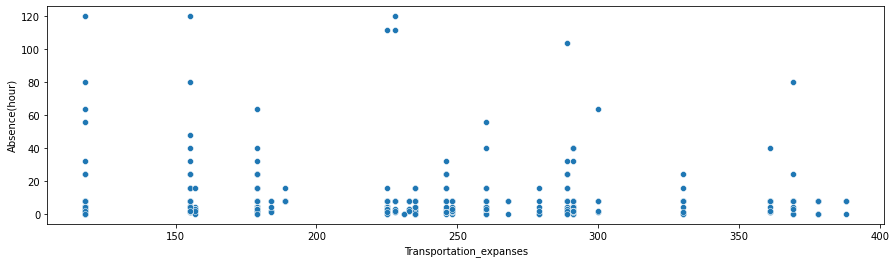

In [27]:
plt.figure(figsize = (15,4))
sns.scatterplot(x='Transportation_expanses',y='Absence(hour)',data=df)

Absence hour is high in lower transportation expanses

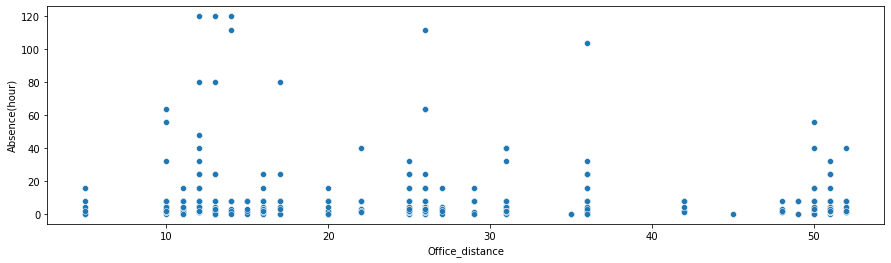

In [28]:
plt.figure(figsize = (15,4))
sns.scatterplot(x='Office_distance',y='Absence(hour)',data=df)

office distance is average than absence is highers

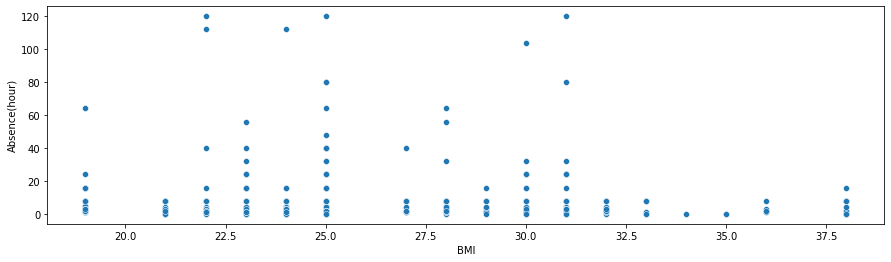

In [29]:
plt.figure(figsize = (15,4))
sns.scatterplot(x='BMI',y='Absence(hour)',data=df)

Absence is higher in between BMi of 22 to 32

In [32]:
df.head()

,ID,Reason,Month,Day,Seasons,Transportation_expanses,Office_distance,Time,Age,Workload,Hit_target,Discipline,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absence(hour)
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [33]:
df = df.drop(['ID','Height','Weight'], axis = 1)

In [34]:
df['Workload'].unique()

array([239554, 205917, 241476, 253465, 306345, 261306, 308593, 302585,
       343253, 326452, 378884, 377550, 275312, 265615, 294217, 265017,
       284031, 236629, 330061, 251818, 244387, 239409, 246074, 253957,
       230290, 249797, 261756, 284853, 268519, 280549, 313532, 264249,
       222196, 246288, 237656, 275089, 264604, 271219], dtype=int64)

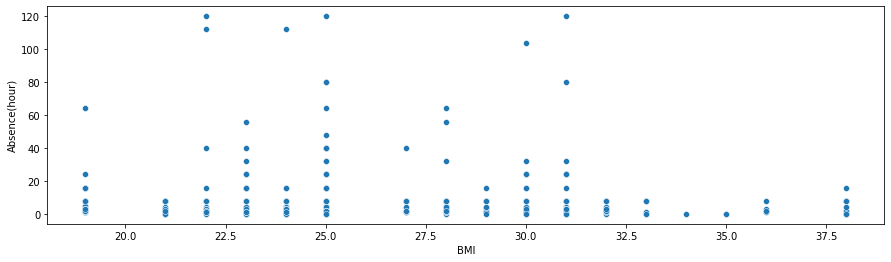

In [35]:
plt.figure(figsize = (15,4))
sns.scatterplot(x='BMI',y='Absence(hour)',data=df)

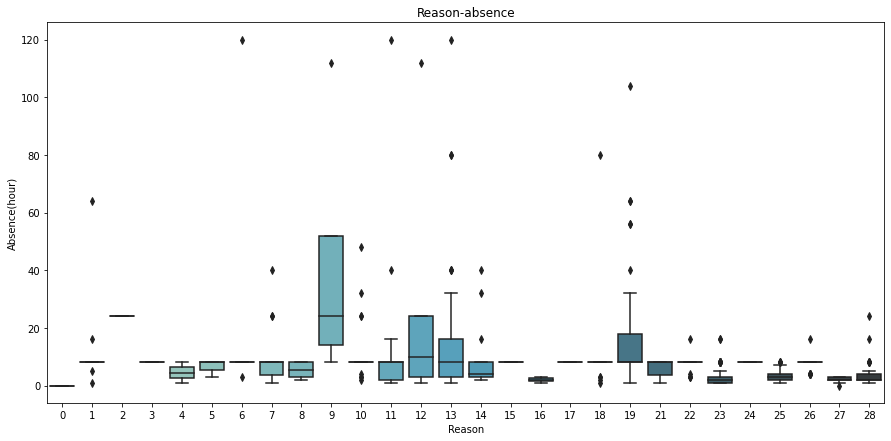

In [36]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Reason', y = 'Absence(hour)', data = df, palette= 'GnBu_d').set_title('Reason-absence')
plt.show()

In absence hour, higher reason is given is 9,12 and 19th

In [37]:
df.head()

,Reason,Month,Day,Seasons,Transportation_expanses,Office_distance,Time,Age,Workload,Hit_target,Discipline,Education,Son,Drinker,Smoker,Pet,BMI,Absence(hour)
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,30,2


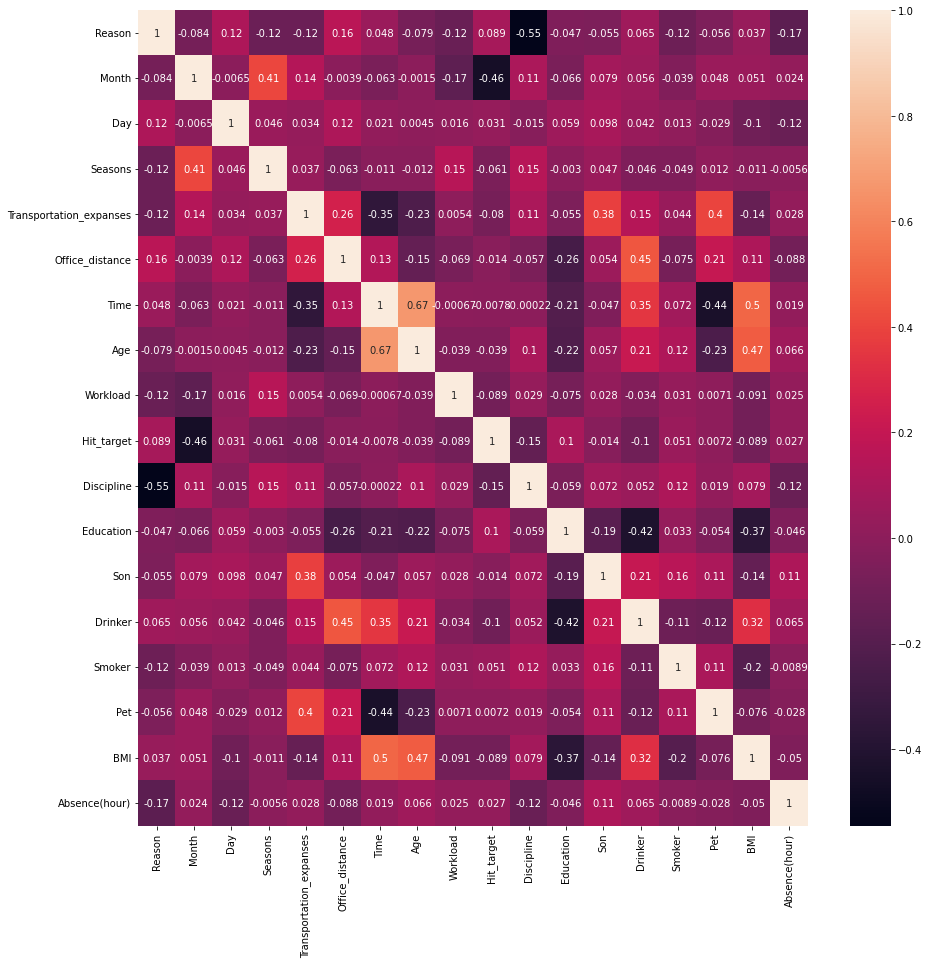

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,linecolor="black")

In [39]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<4.5).all(axis=1)]
print(df_1.shape)

#We had 250 near ourliers, which we removed using Z-score technique

(740, 18)
(723, 18)


In [72]:
df_1.skew()

Reason                    -0.319034
Month                      0.064117
Day                        0.089063
Seasons                   -0.050342
Transportation_expanses    0.397699
Office_distance            0.316048
Time                       0.118969
Age                        0.633561
Workload                   0.949485
Hit_target                -1.081796
Discipline                 3.898281
Education                  1.998654
Son                        1.102360
Drinker                   -0.248599
Smoker                     3.242408
Pet                        0.700507
BMI                        0.294966
Absence(hour)              0.215813
dtype: float64

In [73]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=1.9:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -0.8:
        df_1[col]=np.power(df_1[col],2)


In [74]:
df_1.skew()

Reason                    -0.319034
Month                      0.064117
Day                        0.089063
Seasons                   -0.050342
Transportation_expanses    0.397699
Office_distance            0.316048
Time                       0.118969
Age                        0.633561
Workload                   0.949485
Hit_target                -0.782952
Discipline                 3.898281
Education                  1.964570
Son                        1.102360
Drinker                   -0.248599
Smoker                     3.242408
Pet                        0.700507
BMI                        0.294966
Absence(hour)              0.215813
dtype: float64

In [75]:
df_1 = df_1.drop(['Month','Day','Seasons','Time'],axis = 1)

In [76]:
x = df_1.drop(['Absence(hour)'], axis = 1)
y = df_1['Absence(hour)']

In [77]:
from sklearn.preprocessing import StandardScaler 
STD=StandardScaler()
x=STD.fit_transform(x)

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

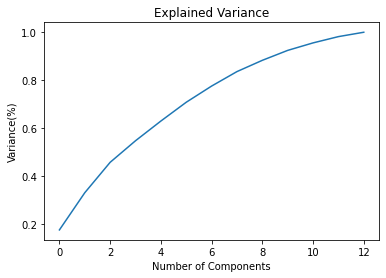

In [79]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [80]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 49.71036027579522
Testing:- 50.44018507865262
Error
MAE 0.308826470272295
MSE 0.2014755897901634
RMSE 0.4488603232523046
R2 Score 50.44018507865262


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
dtr=DecisionTreeRegressor()
svr=SVR()
kn=KNeighborsRegressor(n_neighbors=5)

In [82]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

DECISION TREE REGRESSOR

In [83]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 94.84336020163433
Testing:- 27.214696820221473
MAE 0.3257678115528059
MSE 0.2958942019754229
RMSE 0.5439615813413875
R2 Score 27.214696820221473


In [84]:
dtr_pred = dtr.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

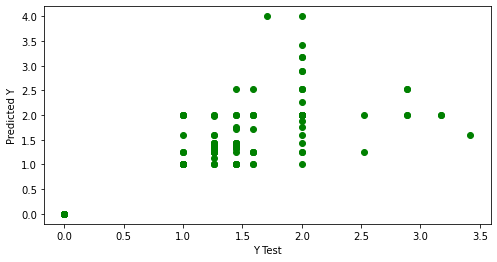

In [85]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


SUPPORT VECTOR REGRESSOR

In [86]:
fun(svr)

TRAINING:- 60.65604914537377
Testing:- 56.669137105889014
MAE 0.2864642015158791
MSE 0.1761530217891777
RMSE 0.41970587533316434
R2 Score 56.669137105889014


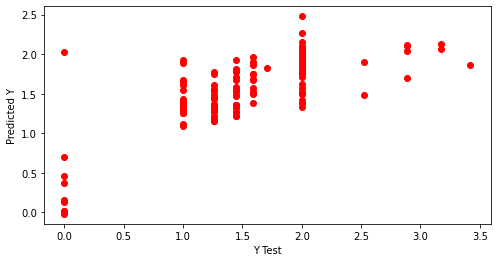

In [87]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

KNN REGRESSOR

In [88]:
fun(kn)

TRAINING:- 65.61413627320441
Testing:- 46.00186630869685
MAE 0.3389003657624747
MSE 0.21951869372977112
RMSE 0.4685282208466968
R2 Score 46.00186630869685


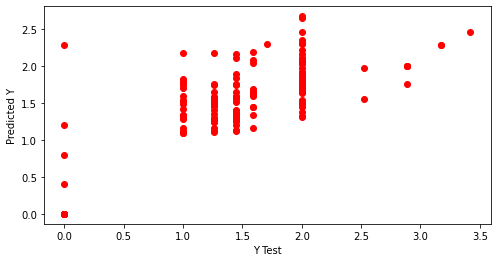

In [89]:
kn_pred = kn.predict(x_test)
plt.figure(figsize=(8,4))
plt.scatter(y_test,kn_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### ENSEMBLE TECHNIQUE

RANDOM FOREST REGRESSOR

In [90]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 89.8031880504298
Testing:- 57.91549170648413
MAE 0.3028154188141596
MSE 0.17108621456560147
RMSE 0.4136256937928318
R2 Score 57.91549170648413


ADABOOST REGRESSOR

In [91]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 55.89392943902895
Testing:- 45.20051470013341
MAE 0.36231420751929516
MSE 0.22277642962367722
RMSE 0.4719919804654283
R2 Score 45.20051470013341


GRADIENTBOOSTING REGRESSOR

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 74.52280094837059
Testing:- 56.96664685217622
MAE 0.2998634629710177
MSE 0.17494355497222805
RMSE 0.41826254311404465
R2 Score 56.96664685217622


CROSS VALIDATION TECHNIQUE

In [93]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(svr,x,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)

score of cross validation score for svr 38.129069346569885
score of cross validation score for dtr 21.482047956431714
score of cross validation score for rd 53.832851321752784
score of cross validation score for Gd 53.950890645749006
score of cross validation score for ad 42.75614697737159


HYPER PARAMETER TUNING

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [96]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [97]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [98]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



In [104]:
randmf = RandomForestRegressor(n_estimators = 20, min_samples_split = 6, 
                               min_samples_leaf= 3, max_features = 'auto', max_depth= 110, 
                               bootstrap=True) 
randmf.fit(x_train, y_train) 


RandomForestRegressor(max_depth=110, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=20)

In [105]:
fun(randmf)

TRAINING:- 79.87416331230932
Testing:- 62.93570690846448
MAE 0.29268024781970503
MSE 0.15067752618979266
RMSE 0.3881720316944443
R2 Score 62.93570690846448


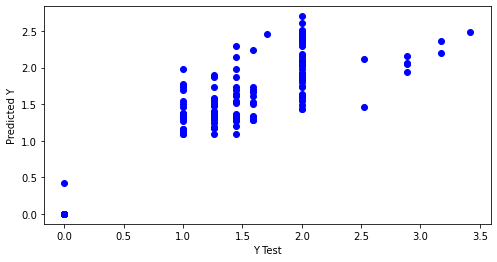

In [106]:
randmf_pred= randmf.predict(x_test)
randmf_pred = randmf_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,randmf_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [107]:
score=cross_val_score(randmf,x,y,cv=4)
print('score of cross validation score for rd hyper',score.mean()*100)

score of cross validation score for rd hyper 52.55849790066658


In [108]:
import pickle
filename='absence.pkl'
pickle.dump(gd,open(filename,'wb'))

       Actual   Predict
574  1.442250  1.638579
499  1.259921  1.401941
579  2.000000  2.332156
457  1.259921  1.585204
677  1.442250  1.729069
..        ...       ...
705  1.000000  1.737945
408  2.000000  1.581907
252  2.000000  2.189015
253  1.442250  2.290360
97   1.442250  1.348856

[145 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

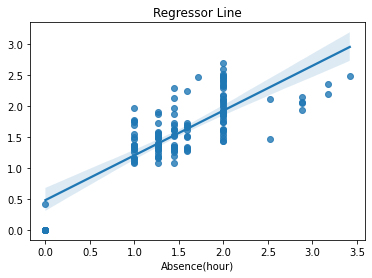

In [109]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=randmf_pred

res

print(res)
sns.regplot(y_test,randmf_pred)
plt.title('Regressor Line')